Number of qubits: 4, gates:OrderedDict({'h': 7, 'cx': 3, 'measure': 3, 'x': 1, 'barrier': 1}), Operations:14


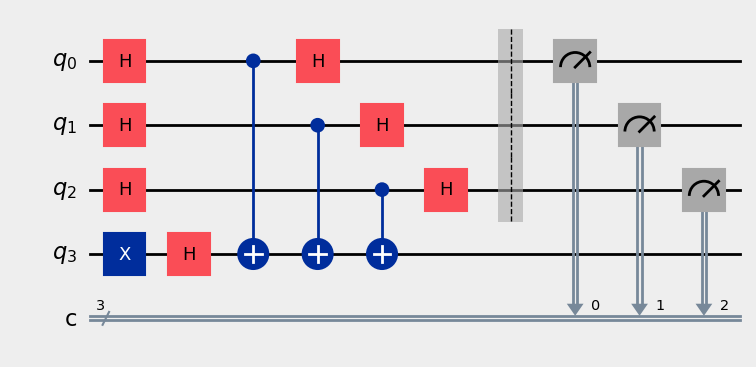

In [5]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt
# Create a Quantum Circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(4, 3)

# Add a Hadamard gate on qubit 0
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(3)
qc.h(3)

qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(2, 3)

qc.h(0)
qc.h(1)
qc.h(2)

qc.barrier(0,1,2)

# Measure qubits 0, 1, and 2
qc.measure([0, 1, 2], [0, 1, 2])


print(f'Number of qubits: {qc.num_qubits}, gates:{qc.count_ops()}, Operations:{qc.size()}')

# Draw the circuit
qc.draw(output='mpl', style={'backgroundcolor': '#EEEEEE'})

In [8]:
from qiskit.providers.fake_provider import GenericBackendV2
from qiskit import QuantumCircuit
from qiskit.compiler import transpile

backend = GenericBackendV2(num_qubits=5)

n_qubits = 1
qc = QuantumCircuit(n_qubits, n_qubits)

for i in range(n_qubits):
    qc.x(i)
    
n_repeats = 100
for _ in range(n_repeats):
  for i in range(n_qubits):
      qc.id(i)
    
qc.measure(range(n_qubits), range(n_qubits))

# Transpile with optimization level 0 to keep the id gates, usimg the simulator with the noise model from the fake device
transpiled_circuit = transpile(qc, backend, optimization_level=0)

# Run the noisy simulation
job = backend.run(transpiled_circuit)

# Get the measurement results
counts = job.result().get_counts()

# Display the counts
print(counts)

{'1': 1002, '0': 22}


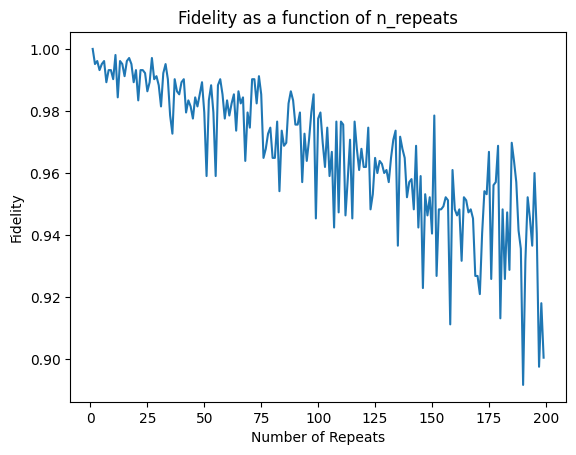

In [9]:
def fidelity(n_repeats):
    # Fetch backend and noise model
    from qiskit.providers.fake_provider import GenericBackendV2  # Replace with the mock device you'd like to use

    # Generate a 5-qubit simulated backend
    backend = GenericBackendV2(num_qubits=5)

    # Initialize the quantum circuit
    n_qubits = 1
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Initialize to the |1⟩ state
    for i in range(n_qubits):
        qc.x(i)

    # Apply identity gates `n_repeats` times
    for _ in range(n_repeats):
        for i in range(n_qubits):
            qc.id(i)

    # Add measurements
    qc.measure(range(n_qubits), range(n_qubits))

    # Transpile with optimization level 0 to keep the id gates, usimg the simulator with the noise model from the fake device
    transpiled_circuit = transpile(qc, backend, optimization_level=0)

    # Run the noisy simulation
    job = backend.run(transpiled_circuit)

    # Get the measurement results
    counts = job.result().get_counts()

    # Total number of shots (simulations)
    total_shots = sum(counts.values())

    # Number of times the expected state was measured
    count_0 = counts.get('0')
    count_1 = counts.get('1')  # Get the count of state |1⟩, default to 0 if not present

    # Calculate fidelity
    fidelity = count_1 / total_shots

    return fidelity


import matplotlib.pyplot as plt

#"""
#Plotting routine
#"""
# Plotting the fidelity as a function of n_repeats
n_repeats_values = range(1, 200)
fidelities = [fidelity(n) for n in n_repeats_values]

plt.plot(n_repeats_values, fidelities)
plt.xlabel('Number of Repeats')
plt.ylabel('Fidelity')
plt.title('Fidelity as a function of n_repeats')
plt.show()